In [1]:
#from getSTDOUT import getData
import sandbox as sb
from matplotlib import pyplot as plt

In [2]:
# standard output files in $SCRATCH2/ivana/bcg.hd/run 
dt120 = sb.getMonData('STDOUT.0000.dt120')
dt160 = sb.getMonData('STDOUT.0000.dt160')
dt200 = sb.getMonData('STDOUT.0000.dt200')
dt240 = sb.getMonData('STDOUT.0000.dt240')

In [15]:
def plotBcgCFL(ax, cfl, title, ymax=0.065):
    hr = 'hours'
    
    ax.plot(dt120.getVals( hr ), dt120.getVals( cfl ), label='$\Delta t$ = 120 s')
    ax.plot(dt160.getVals( hr ), dt160.getVals( cfl ), label='$\Delta t$ = 160 s')
    ax.plot(dt200.getVals( hr ), dt200.getVals( cfl ), label='$\Delta t$ = 200 s')
    ax.plot(dt240.getVals( hr ), dt240.getVals( cfl ), label='$\Delta t$ = 240 s')
    
    ax.set_title(title)
    ax.set_xlabel('time [hours]')
    if title == 'Zonal [UVEL]':
        ax.set_ylabel('CFL [1]')
    ax.set_ylim(0,ymax)
    if title == 'Meridional [VVEL]':
        ax.legend()
    ax.grid()
    
    return None

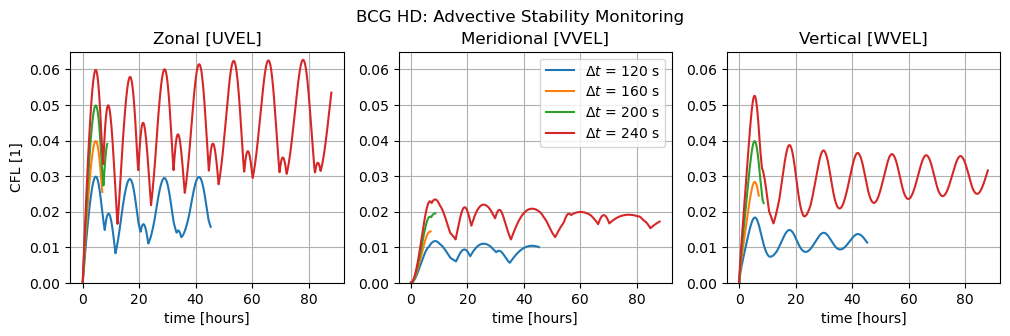

In [16]:
# Plot CFL in u, v, and w for each unique time step size
u   = 'advcfl_uvel_max'; v   = 'advcfl_vvel_max'; w   = 'advcfl_wvel_max'

f, ax = plt.subplots(1,3, figsize=(12,3))
plt.suptitle('BCG HD: Advective Stability Monitoring', y=1.02)
plotBcgCFL(ax[0], u, 'Zonal [UVEL]')
plotBcgCFL(ax[1], v, 'Meridional [VVEL]')
plotBcgCFL(ax[2], w, 'Vertical [WVEL]')

# plt.savefig('/home/ivana/regionalgcm/img/bcg.hd_cfl.png')
plt.show()

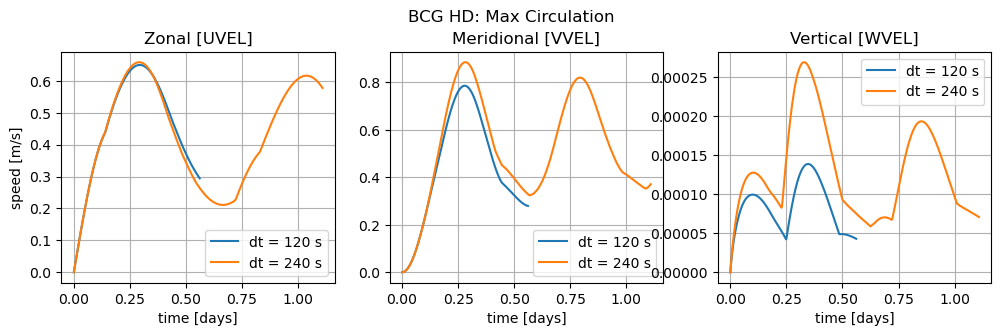

In [10]:
uvel = 'dynstat_uvel_max'
vvel = 'dynstat_vvel_max'
wvel = 'dynstat_wvel_max'

f, ax = plt.subplots(1,3, figsize=(12,3))
plt.suptitle('BCG HD: Max Circulation', y=1.02)

ax[0].plot(dt120.getVals( 'days' ), dt120.getVals( uvel ), label='dt = 120 s')
ax[0].plot(dt240.getVals( 'days' ), dt240.getVals( uvel ), label='dt = 240 s')
ax[0].set_title('Zonal [UVEL]')
ax[0].set_xlabel('time [days]')
ax[0].set_ylabel('speed [m/s]')
ax[0].legend()
ax[0].grid()

ax[1].plot(dt120.getVals( 'days' ), dt120.getVals( vvel ), label='dt = 120 s')
ax[1].plot(dt240.getVals( 'days' ), dt240.getVals( vvel ), label='dt = 240 s')
ax[1].set_title('Meridional [VVEL]')
ax[1].set_xlabel('time [days]')
ax[1].legend()
ax[1].grid()

ax[2].plot(dt120.getVals( 'days' ), dt120.getVals( wvel ), label='dt = 120 s')
ax[2].plot(dt240.getVals( 'days' ), dt240.getVals( wvel ), label='dt = 240 s')
ax[2].set_title('Vertical [WVEL]')
ax[2].set_xlabel('time [days]')
# ax[2].set_ylim(0,0.0002)
ax[2].legend()
ax[2].grid()

# plt.savefig('/home/ivana/regionalgcm/img/bcg.hd_vel.png')
plt.show()